In [1]:
import wandb
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

/home/oyemiadeyemo/miniconda3/envs/mlflow-e4fcefd643ef1ee947cfeff48521954cf08a16aa/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

/home/oyemiadeyemo/miniconda3/envs/mlflow-e4fcefd643ef1ee947cfeff48521954cf08a16aa/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
wandb: Currently logged in as: oyemiadeyemo (oyemiadeyemo-teesside-university). Use `wandb login --relogin` to force relogin


In [3]:
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [4]:
print(df.head())

         id                                               name    host_id  \
0   9138664                Private Lg Room 15 min to Manhattan   47594947   
1  31444015  TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...    8523790   
2   8741020  Voted #1 Location Quintessential 1BR W Village...   45854238   
3  34602077  Spacious 1 bedroom apartment 15min from Manhattan  261055465   
4  23203149   Big beautiful bedroom in huge Bushwick apartment     143460   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0      Iris              Queens       Sunnyside  40.74271  -73.92493   
1    Johlex           Manhattan  Hell's Kitchen  40.76682  -73.98878   
2      John           Manhattan    West Village  40.73631  -74.00611   
3     Regan              Queens         Astoria  40.76424  -73.92351   
4     Megan            Brooklyn        Bushwick  40.69839  -73.92044   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     74   

In [5]:
print(df.isnull().sum())

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [6]:
print(df.isnull().sum())

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64


#### Boxplot comparing price across different room_types 

<Axes: xlabel='price', ylabel='Count'>

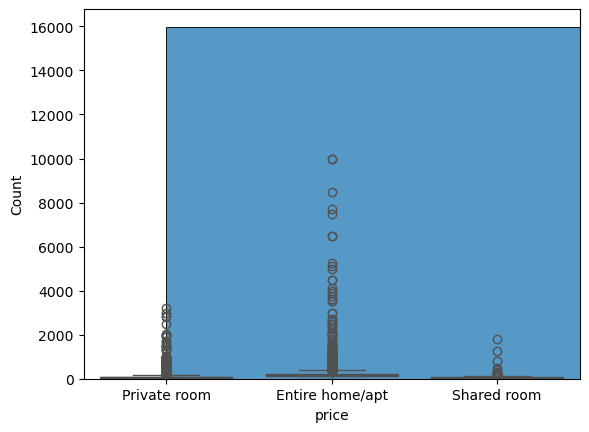

In [7]:
sns.histplot(df['price'], bins=50)
sns.boxplot(x='room_type', y='price', data=df)

#### Listings by Location

<Axes: xlabel='longitude', ylabel='latitude'>

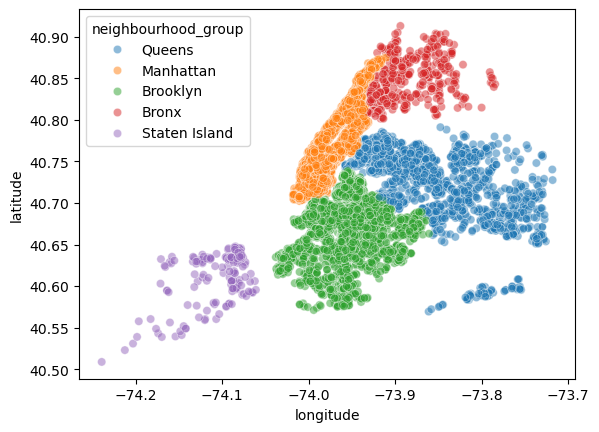

In [8]:
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5, data=df)

#### Price Distribution

(0.0, 500.0)

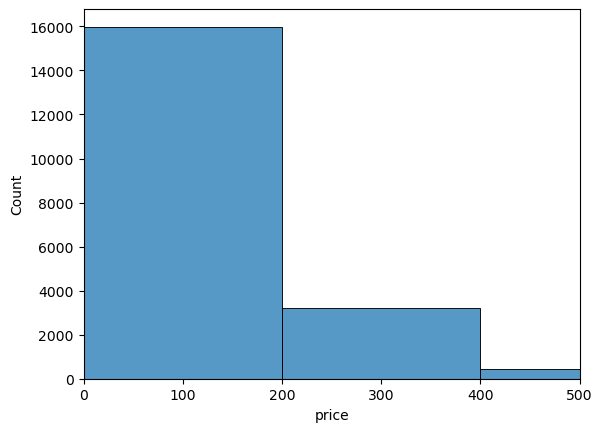

In [9]:
sns.histplot(df['price'], bins=50)
plt.xlim(0, 500)

#### 🏠Room Type vs Price

(0.0, 500.0)

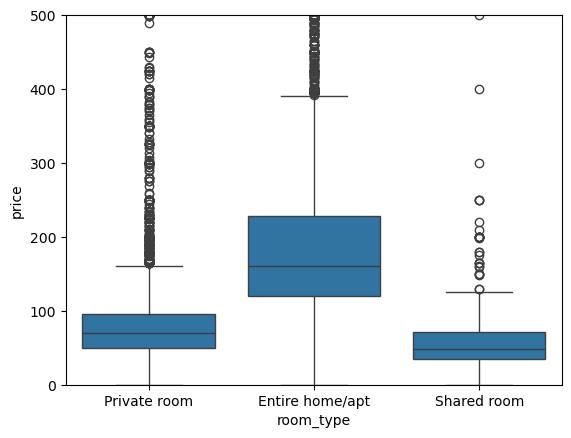

In [10]:
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)

#### Listings per Neighbourhood Group

<Axes: xlabel='count', ylabel='neighbourhood_group'>

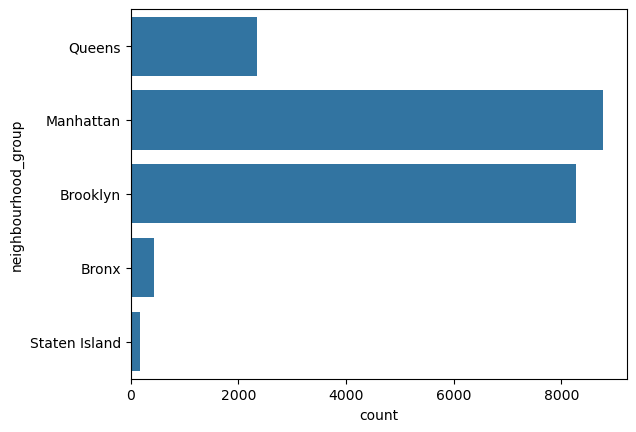

In [11]:
sns.countplot(y='neighbourhood_group', data=df)

#### Availability vs Price

<Axes: xlabel='availability_365', ylabel='price'>

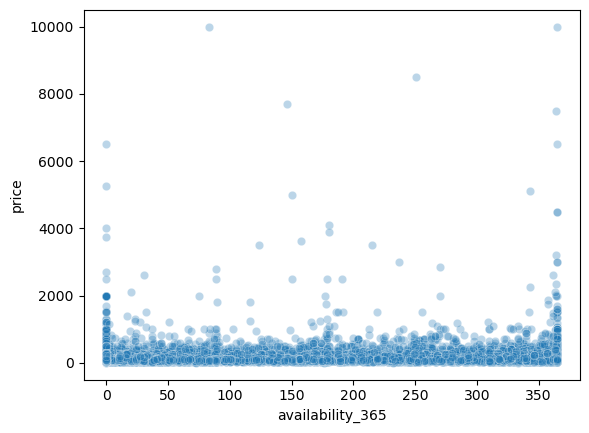

In [12]:
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.3)

#### Minimum Nights Distribution

(0.0, 30.0)

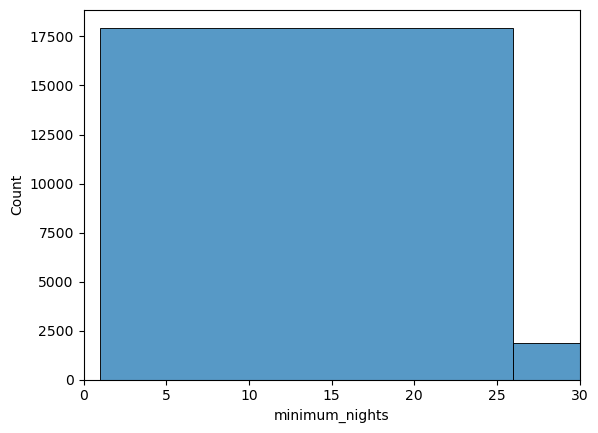

In [13]:
sns.histplot(df['minimum_nights'], bins=50)
plt.xlim(0, 30)

#### Correlation Heatmap for numeric only

<Axes: >

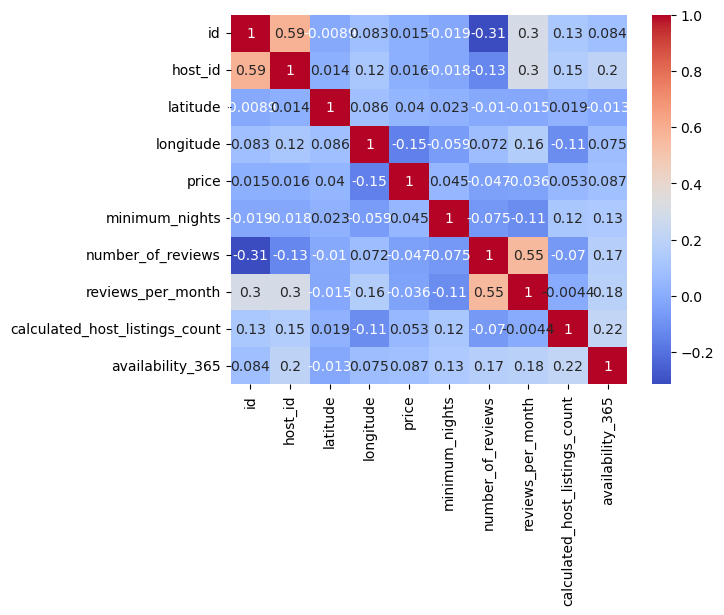

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [15]:
profile = ProfileReport(df, title="YData Profiling Report", minimal=True)
profile.to_file("ydata_profile_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 48.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [17]:
run.finish()